<h1>K-means Clustering</h1>
<img src="../data/K_means.gif" width="1000" align="center">

## Data, Datapoints and Data Dimensions
### What is data?
"Data" simply refers to some information about the world that we can measure in some way. It could be the number of cars driving down a street every hour or the maximum temperature on any given day. It can be broadly catergorised into "discrete" or "continuous" data. Discrete data comes in individual chunks that we usualy count up, for example the number of cars. Continuous data can take any value and is usualy what we get when we take some measurement, for example temperature. <br>
### What is a Datapoint?
"Datapoint" is what we call a single measurement that we have taken. This single measurement could contain many different values (numbers) which we call dimensions.
### What are the Dimensions of a Datapoint?
In the context of a datapoint "dimension" is just some aspect or feature of a datapoint. For example you may be conducting a survey and have 5 yes or no questions you want people to answer. Lets say you got 100 people to fill out your survey, we could say that each survey responce (person) is a single datapoint, we would therefore have 100 datapoints. Each datapoint would have 5 dimensions (it would be 5 dimensional), where each dimension tells us a different aspect of our datapoint (person). We therefore have 100, 5 dimensional datapoints.

In [1]:
import matplotlib.pyplot as plt
import numpy as np               
import time
from IPython.display import clear_output

#Custom module to deal with downloading the dataset
from load import test_x

<b>Using the module "load" that comes with this notebook, lets load our dataset</b><br>
The dataset we'll be using is the MNIST dataset, a dataset of small, low-res handwritten digits. There are 60000 training images and 10000 test images divided up into 10 classes (digits 0-9). Here we will be using the test set (as it's a smaller set)

In [2]:
#Number of datapoint
num_img = 10000  
#Number of cluster centers, 10 because the dataset contains 10 classes eg: digit 0 to 9
num_means = 10   
#We'll perform this many iterations of the algorithm
iterations = 20 
#Each image is 28*28 pixels, which has been flattened to a vector 0f 784 values
data_size = 28*28
# The images are 8 bit greyscale images (values range from 0-255)
# We'll rescale the pixel values to be between 0-1 (We don't REALLY need to do this for k-means)
test_x = (test_x.astype(float) / 255)

<b>Lets visualise some data!</b>

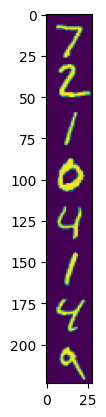

In [3]:
plt.imshow(test_x[0:8].reshape(28*8, 28))

In [4]:
test_x[0:8].shape

(8, 784)

With our knowledge of Python and now Numpy lets create an implementation of a famous machine learning algorithm "K-Means Clustering". The job of a clustering algorithm is to break a dataset into some number of "clusters" (groups), the number of clusters usually defined by the user. K-Means clustering works by iteratively updating a pre-defined number of cluster centers. It does this by finding the distance between each datapoint and every cluster center. Datapoints are then assigned to the cluster center they are closest to and each cluster center is updated to be the mean of the new cluster. These steps are repeated for some number of steps or until the cluster centers converge (they stop moving so much).<br>

[For more Information on K-means](https://en.wikipedia.org/wiki/K-means_clustering)<br>

<b>Lets have a look at the steps of K-means clustering</b><br>
1. Define the number of clusters "k" you want to group your data into<br>
2. Randomly initialise k vectors with the same size as each datapoint, this is the initialisation of our cluster centers<br>
3. Calculate the distance between each datapoint and each cluster center (using MSE or equivalent)<br>
4. For every datapoint find the cluster center they are closest to<br>
5. Re-calculate the cluster centers by finding the mean of every new cluster<br>
6. Repeat steps 3-5 for n steps or until convergence

<h3> Kmeans Initialization </h3>
Here we'll initialise the cluster centers to random values by randomly sampling 10 points from the dataset

In [5]:
#Randomly generate K indicies for k datapoints from the dataset (indicies need to be int)
means = test_x[np.random.choice(test_x.shape[0], num_means, replace=False)]

<h3> Kmeans Algorithm </h3>
Now implement the main steps of the K-Means clustering algorithm! Try and make it as efficient as possible and minimise the time/iteration, using Numpy functionality you should be able to get it down to only one For loop (do NOT use any K-Means functions!)

In [6]:
start_time = time.time()

for i in range(iterations):
    distances = np.zeros((num_means, num_img))
    for centroid in range(num_means):
        distances[centroid] = np.mean((test_x - means[centroid])**2, axis=1)
        
    assignments = np.argmin(distances, axis=0)
    
    for centroid in range(num_means):
        means[centroid] = np.mean(test_x[assignments == centroid], axis=0)
        
end_time = time.time()
print("%d iterations took %.2f seconds, which corresponds to %.2fs/iteration" % (iterations, end_time - start_time, (end_time - start_time)/iterations))

20 iterations took 4.57 seconds, which corresponds to 0.23s/iteration


<h3>Lets visualise the the cluster centers!</h3>

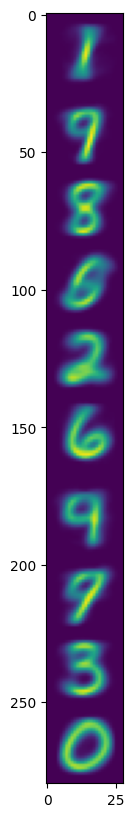

In [7]:
plt.figure(1, figsize=(20, 10))
img = means.reshape(num_means*28,28)
plt.imshow(img)